In [1]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt

**说明**：由于官方 Numpy 代码调整，大部分`np.ramdom.x`函数建议通过`np.random.default_rng()`、`np.random.Generator`的实例化对象调用，但目前直接仍可调用`np.ramdom.x`

<center>

# Numpy v.s. random


### 单个随机数的生成

##### 1. U(0, 1) 浮点数：

In [38]:
nloop = 1000000

t0 = time.time()
for i in range(nloop):
    np.random.rand()
t1 = time.time()
print("NumPy:\t", t1-t0)

t0 = time.time()
for i in range(nloop):
    random.random()
t1 = time.time()
print("random:\t", t1-t0)

NumPy:	 0.42685461044311523
random:	 0.09079265594482422


##### 2. U(a, b) 整数：

In [53]:
nloop = 1000000
a, b = 0, 10

t0 = time.time()
for i in range(nloop):
    np.random.randint(a, b+1)
t1 = time.time()
print("NumPy:\t", t1-t0)

t0 = time.time()
for i in range(nloop):
    random.randrange(a, b+1)
t1 = time.time()
print("random:\t", t1-t0)

NumPy:	 2.2469849586486816
random:	 0.811866044998169


##### 3. N(0, 1)：

In [52]:
nloop = 1000000
mu, sigma = 0, 1

t0 = time.time()
for i in range(nloop):
    np.random.randn()
t1 = time.time()
print("NumPy:\t", t1-t0)

t0 = time.time()
for i in range(nloop):
    random.gauss(mu, sigma)
t1 = time.time()
print("random:\t", t1-t0)

NumPy:	 0.4747278690338135
random:	 0.7250597476959229


<div align=center>

# 正态分布

</div>

## np.random.randn()
`np.random.randn(d0, d1, ..., dn)`

无参时返回服从 $N(0, 1)$ 的一个浮点数，有参时返回每个元素均服从 $N(0, 1)$ 的 ndarray，数组维数与传参个数相同，只提供一个参数`x`时返回形状为`(x,)`；**注意所传参数不需要加括号！！**

In [4]:
x = np.random.randn(1)
print(type(x),x.shape)

<class 'numpy.ndarray'> (1,)


## np.random.standard_normal()
`np.random.standard_normal(size=None)`

`size=None`时返回服从正态分布的浮点数，或根据`size`返回浮点数组。

## np.random.normal()

`np.random.normal(loc=0.0, scale=1.0, size=None)`

**Args**

loc: float or array_like of floats

scale : float or array_like of floats
    Standard deviation (spread or "width") of the distribution. Must be
    non-negative.
size: 整数或由整数构成的元组，
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  If size is ``None`` (default),
    a single value is returned if ``loc`` and ``scale`` are both scalars.
    Otherwise, ``np.broadcast(loc, scale).size`` samples are drawn.



.. note::
    New code should use the ``normal`` method of a ``default_rng()``
    instance instead; see `random-quick-start`.

Returns

out : ndarray or scalar
    Drawn samples from the parameterized normal distribution.

See Also

scipy.stats.norm : probability density function, distribution or
    cumulative density function, etc.
Generator.normal: which should be used for new code.




**Type**

builtin_function_or_method

#  

#  

In [7]:
rng = np.random.Generator(np.random.PCG64())

## Generator.standard_normal()

`rng.standard_normal(size=None, dtype=np.float64, out=None)`

**Docstring**

返回服从标准正态分布的浮点数或浮点数组

**Args**

- size: 略

- dtype: 仅支持`float64` and `float32`，字节顺序必须是本地的

- out : ndarray, optional
    Alternative output array in which to place the result. If size is not None, it must have the same shape as the provided size and must match the type of the output values.



##### Examples

In [ ]:
>>> rng = np.random.default_rng()
>>> rng.standard_normal()
2.1923875335537315 #random

>>> s = rng.standard_normal(8000)
>>> s
array([ 0.6888893 ,  0.78096262, -0.89086505, ...,  0.49876311,  # random
       -0.38672696, -0.4685006 ])                                # random
>>> s.shape
(8000,)
>>> s = rng.standard_normal(size=(3, 4, 2))
>>> s.shape
(3, 4, 2)

In [60]:
seed = 82298
# np.random.seed(seed)
rng = np.random.default_rng(seed=seed)
for i in range(3):
    print(rng.integers(0, 2, 10)*2-1)

[ 1 -1 -1 -1 -1  1  1 -1 -1 -1]
[-1  1  1 -1  1  1 -1 -1  1  1]
[-1 -1  1 -1  1 -1 -1 -1 -1 -1]


#  

#  

# np.random.uniform()

`uniform(low=0.0, high=1.0, size=None)`

新代码应通过``np.random.default_rng()``的实例化对象调用``uniform``函数

**Args**

- low, high: 均为浮点或浮点型数组，`high=low`时返回`low`

- size: ``None``时会自动调用``np.broadcast(low, high).size``生成结果，否则按照给定参数输出

**Type**

buildin_functions_or_methods



**see also**

random_integers : Discrete uniform distribution over the closed
                  interval ``[low, high]``.
random_sample : Floats uniformly distributed over ``[0, 1)``.
random : Alias for `random_sample`.
rand : Convenience function that accepts dimensions as input, e.g.,
       ``rand(2,2)`` would generate a 2-by-2 array of floats,
       uniformly distributed over ``[0, 1)``.
Generator.uniform: which should be used for new code.





In [99]:
x = np.random.uniform(size=3)
y = np.random.uniform(size=[1, 3])
print(x, y, sep="\n")

[0.64064014 0.9460009  0.6840569 ]
[[0.93503656 0.19949061 0.77188791]]


## rand v.s random v.s uniform

- 速度上，rand > random > uniform

In [36]:
nloop = 1000000

t0 = time.time()
for i in range(nloop):
    np.random.rand()
t1 = time.time()
print("rand:\t", t1-t0)

t0 = time.time()
for i in range(nloop):
    np.random.random()
t1 = time.time()
print("random:\t", t1-t0)

t0 = time.time()
for i in range(nloop):
    np.random.uniform()
t1 = time.time()
print("uniform:", t1-t0)

rand:	 0.44082045555114746
random:	 0.4777510166168213
uniform: 1.9836783409118652


#  

#  

## np.random.randint()
`np.random.randint(low, high=None, size=None, dtype=int)`

**Args**

- low, high: 均为整数或整数组成的数组，`high`为`None`时则生成服从离散 $U\left[0, low\right)$ 的随机整数，为`high`单一整数则生成服从离散 $U\left[low, high\right)$ 的随机整数，为数组时，`low`与`high`应以一定程度匹配，并返回数组形状为由`low`与`high`维度匹配的结果，推断得到的形状与`size`不同时会报错，详见下例

- size: `None`时返回单一整数或根据`low`与`high`列表推断的形状，否则返回参数设定形状的数组

- dtype: 字节顺序(Byteorder)必须是本地的

**Type**: builtin_function_or_method

In [ ]:
# x = [x1, x2, x3], where x1~U[1, 2], x2~U[3, 4], x1~U[5, 6]
x = np.random.randint(low=[1, 3, 5], high=[3, 5, 7])
# x = [x1, x2, x3], where x1~U[1, 5], x2~U[3, 5], x1~U[5, 5]
x = np.random.randint(low=[1, 3, 5], high=6)
# x = [[x1, x2], [x3, x4]],
# where x1~U[1, 3], x2~U[3, 3], x3~U[1, 3], x4~U[3, 4]
x = np.random.randint(low=[1, 3], high=[[4], [5]])
print(x)

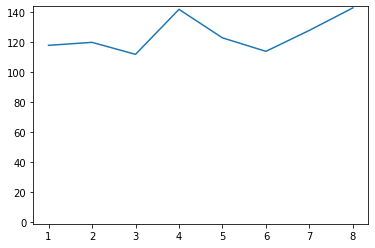

In [19]:
bw = np.random.randint(1, 9, [1000])
dist = []
cnt = 0
for i in range(1, 9):
    num = np.sum(bw == i)
    dist += [num]

plt.plot(range(1, 9), np.array(dist))
plt.ylim(-1, np.max(dist) + 1)
plt.show()

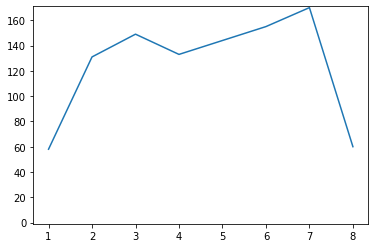

In [51]:
bw = np.random.uniform(1, 8, [1000])
bw = np.round(bw)
dist = []

for i in range(1, 9):
    num = np.sum(bw == i)
    dist += [num]

plt.plot(range(1, 9), np.array(dist))
plt.ylim(-1, np.max(dist) + 1)
plt.show()

尽管该函数可以一次生成随机数组，但当数组长度较短时 (约 ≤ 5)，单独生成逐个元素耗时更短

In [24]:
n = 6
param = 7
nloop = 10000

t0 = time.time()
for i in range(nloop):
    x = np.random.randint(param, size=n)
t1 = time.time()
print("together:\t", t1-t0)

t0 = time.time()
x = []
for i in range(nloop):
    for j in range(n):
        x += [np.random.randint(param)]
x = np.asarray(x)
t1 = time.time()
print("one by one:\t", t1-t0)

together:	 0.11469173431396484
one by one:	 0.14361572265625


#  

#  

# np.random.choice()

`np.random.choice(a, size=None, replace=True, p=None)`

**Docstring**

返回由给定的 1 维数组元素随机采样得到的数组或整数，新代码应通过``np.random.default_rng()``的实例化对象调用``choice``函数


**Args**

- a: 一维数组或整数；若为`ndarray`(即任何数据形式的`ndarray`)，则随机采样数据来自该数组；若为整数，则等效于`np.arange(a)`

- size: `None`时只产生单个数据

- replace: `True`时代表有放回采样

- p: `a`各元素被采样的所遵从的概率分布，长度应与`a`所表示数组的长度相同，默认均匀分布


**Type**

builtin_function_or_method

In [ ]:
x = np.random.choice(5, 4, p=[0.1, 0.1, 0.1, 0.1, 0.6], replace=False)
x = np.random.choice([2.27, 4.48, -6.23, 6.623, 8.4, -0.442, 4], 3)
x = np.random.choice(12, 3)
print(x)

In [21]:
x = np.arange(0, 24).reshape(4, 6)
x

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [25]:
idx = [[1, 3], [2, 4], [3, 1], [0, 5]]
x[[1, 2, 3], [0, 1, 2]]

array([ 6, 13, 20])

#  

#  

# np.random.gamma()

`np.random.gamma(shape, scale=1.0, size=None)`

**Docstring**

返回服从 $Gamma$ 分布的浮点数或浮点数组，新代码应通过``np.random.default_rng()``的实例化对象调用``gamma``函数。

在 $Ga(\alpha, \lambda)$ 分布

$$p(x) = \frac{\lambda^{\alpha} x^{\alpha-1}}{\Gamma(\alpha)}e^{-\lambda x}$$

中，令 $\lambda = 1/\theta$，则

$$p(x) = \frac{x^{\alpha-1}e^{-x/\theta}}{\Gamma(\alpha)\,\theta^{\alpha}}$$

当 $X\sim Ga(\alpha, \lambda)$，即 $X\sim Ga(\alpha, 1/\theta)$ 时，

$$E(X) = \alpha \theta\,,\,Var(X) = \alpha \theta^2$$

即 $\alpha$ *一定程度上*反映了分布曲线的中心位置，$\theta = 1/\lambda$ 反映了分布的集中程度，进而`shape`指分布中参数 $\alpha$，`scale`指分布中参数 $\theta$。

伽玛分布通常用于模拟电子元件的失效时间，并在泊松分布事件之间的等待时间相关的过程中自然出现


**Args**

- shape, scale: 浮点数或浮点数组

- size: 

    - ``size``为``None``且``shape``和``scale``均为标量时，返回标量
    
    - ``size``为``None``且``shape``和``scale``**不全为**标量时，返回数组大小由``shape``和``scale``的形状推断而得，即等价于调用``np.broadcast(shape, scale).size``来采样
    
    - ``size``**不**为``None``且``shape``和``scale``**不全为**标量时，`size`不得与`broadcast`结果相冲突
    
    - 当``shape``和``scale``均为标量且``size``为指定形状时，略



**See Also**

scipy.stats.gamma : probability density function, distribution or
    cumulative density function, etc.

Generator.gamma: which should be used for new code.

**Type**

builtin_function_or_method

In [7]:
x = np.random.gamma([1, 2], [[0.1], [0.2]])
print(x)

[[0.10175351 0.34007877]
 [0.16798366 0.66287823]]


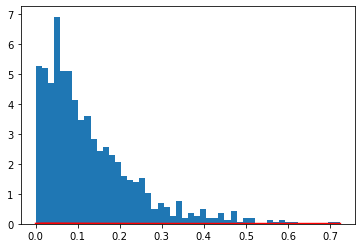

In [16]:
import scipy.special as sps
shape, scale = 1.28, 0.1
s = np.random.gamma(shape, scale, 1000)
count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) * (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')
# plt.xlim(0, 1)
plt.show()

#  

#  

## np.random.permutation()
`np.random.permutation(x)`

若`x`为一整数，则该函数等价于随机排列`range(x)`；若`x`是一个多维数组，则先对该数组进行复制，再随机打乱元素，返回值只沿其第一维随机排列；建议通过`default_rng()`方法的实例化对象使用此函数


##### Examples

In [8]:
x = np.arange(12).reshape(-1, 4)
print(np.random.permutation(x))

[[ 4  5  6  7]
 [ 0  1  2  3]
 [ 8  9 10 11]]


#  

#  

## np.random.shuffle()
`np.random.shuffle(x)`

in-place 地对数组`x`的第一维进行重排，进而该函数没有返回值；其中`x`可以是任意可修改的类数组类型

##### Examples

In [10]:
arr = np.arange(9).reshape((3, 3))
np.random.shuffle(arr)
print(arr)

[[3 4 5]
 [6 7 8]
 [0 1 2]]


# 

In [5]:
def randomize(spin_vec, frac1=None):
    if frac1 is None:
        spin_vec = np.random.randint(0, 2, self.N)*2-1
    else:
        ups = int(len(spin_vec)*frac1)
        spin_vec = np.array([1]*ups+[0]*(len(spin_vec)-ups))
        np.random.shuffle(spin_vec)
        print(self.spin_vec)

In [ ]:
N = 20
spin_vec = 
randomize